# Predict Movie Box Office Revenue Using Linear Regression

## Can we predict a movie's revenue based on its production budget?

In [59]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [60]:
df = pd.read_csv("dirty_data.csv")
df

Rank Release Date                     Movie Title Production Budget ($)  \
0     5293     8/2/1915           The Birth of a Nation              $110,000   
1     5140     5/9/1916                     Intolerance              $385,907   
2     5230   12/24/1916    20,000 Leagues Under the Sea              $200,000   
3     5299    9/17/1920  Over the Hill to the Poorhouse              $100,000   
4     5222     1/1/1925                  The Big Parade              $245,000   
...    ...          ...                             ...                   ...   
5386  2950    10/8/2018                             Meg           $15,000,000   
5387   126   12/18/2018                         Aquaman          $160,000,000   
5388    96   12/31/2020                     Singularity          $175,000,000   
5389  1119   12/31/2020          Hannibal the Conqueror           $50,000,000   
5390  2517   12/31/2020  Story of Bonnie and Clyde, The           $20,000,000   

     Worldwide Gross ($) Domestic Gross ($)  
0            $11,000,000        $10,000,000  
1                     $0                 $0  
2             $8,000,000         $8,000,000  
3             $3,000,000         $3,000,000  
4            $22,000,000        $11,000,000  
...                  ...                ...  
5386                  $0                 $0  
5387                  $0                 $0  
5388                  $0                 $0  
5389                  $0                 $0  
5390                  $0                 $0  

[5391 rows x 6 columns]

In [61]:
df.drop(columns=['Rank', 'Release Date', 'Movie Title', 'Domestic Gross ($)'], inplace=True)

In [62]:
df.columns.values[0] = 'production_budget'
df.columns.values[1] = 'worldwide_gross'

In [63]:
df

production_budget worldwide_gross
0             $110,000     $11,000,000
1             $385,907              $0
2             $200,000      $8,000,000
3             $100,000      $3,000,000
4             $245,000     $22,000,000
...                ...             ...
5386       $15,000,000              $0
5387      $160,000,000              $0
5388      $175,000,000              $0
5389       $50,000,000              $0
5390       $20,000,000              $0

[5391 rows x 2 columns]

In [64]:
def df_cleanup(df):
    for column in df.columns:
        for i in range(0, df.index.stop):
            temp_array = []
            for j in df.at[i,column]:
                if j == '$' or j == ',':
                    continue
                temp_array.append(j)
            df.at[i, column] = int("".join(temp_array))

In [65]:
df_cleanup(df)

In [66]:
zeros = []
for i in range(0, df.index.stop):
    if df.at[i, 'worldwide_gross'] == 0:
        zeros.append(df.index[i])

In [67]:
df.drop(index=zeros, inplace=True)

In [68]:
df.reset_index(inplace=True)

In [69]:
df.drop(columns="index", inplace=True)

In [70]:
df.to_csv("clean_data.csv")

In [71]:
df

production_budget worldwide_gross
0               110000        11000000
1               200000         8000000
2               100000         3000000
3               245000        22000000
4              3900000         9000000
...                ...             ...
5029          55000000       376856949
5030          40000000       166893990
5031         185000000       561137727
5032         175000000       140012608
5033          42000000        57850343

[5034 rows x 2 columns]

In [72]:
df.describe(include='all')

production_budget  worldwide_gross
count                5034             5034
unique                463             4968
top              20000000          8000000
freq                  209                9

In [73]:
df2 = pd.read_csv("clean_data.csv")

In [74]:
df2.drop(columns='Unnamed: 0', inplace=True)

In [75]:
df2.describe()

production_budget  worldwide_gross
count       5.034000e+03     5.034000e+03
mean        3.290784e+07     9.515685e+07
std         4.112589e+07     1.726012e+08
min         1.100000e+03     2.600000e+01
25%         6.000000e+06     7.000000e+06
50%         1.900000e+07     3.296202e+07
75%         4.200000e+07     1.034471e+08
max         4.250000e+08     2.783919e+09

In [76]:
x = pd.DataFrame(df['production_budget'])
y = pd.DataFrame(df['worldwide_gross'])

In [77]:
x

production_budget
0               110000
1               200000
2               100000
3               245000
4              3900000
...                ...
5029          55000000
5030          40000000
5031         185000000
5032         175000000
5033          42000000

[5034 rows x 1 columns]

In [78]:
y

worldwide_gross
0           11000000
1            8000000
2            3000000
3           22000000
4            9000000
...              ...
5029       376856949
5030       166893990
5031       561137727
5032       140012608
5033        57850343

[5034 rows x 1 columns]

(0, 450000000)

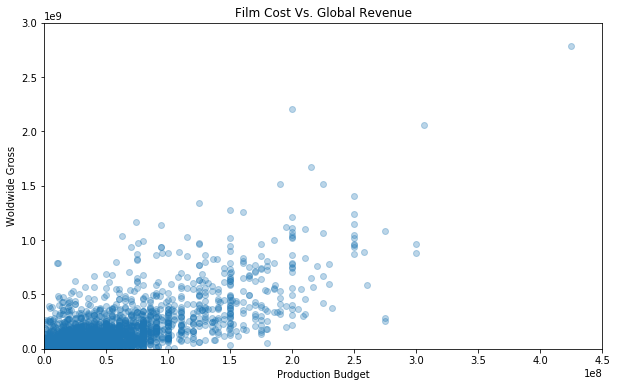

In [79]:
plt.figure(figsize=(10,6))
plt.scatter(x,y, alpha=0.3)
plt.title('Film Cost Vs. Global Revenue')
plt.xlabel('Production Budget')
plt.ylabel('Woldwide Gross')
plt.ylim(0, 3000000000)
plt.xlim(0, 450000000)

In [80]:
regression = LinearRegression()

In [81]:
regression.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
theta_1 = regression.coef_ #theta_1

In [83]:
theta_0 = regression.intercept_ #theta_0

In [84]:
# y_hat = regression.predict(x)
y_hat = theta_0 + theta_1 * x
for i in y_hat.values:
    print(i)

[-6893926.719016652]
[-6613890.8925524]
[-6925041.810846013]
[-6473872.979320275]
[4898693.084311273]
[-6056930.748806833]
[-5499970.605061267]
[-5145258.558206548]
[-6613890.8925524]
[-5870240.197830666]
[-6224952.244685384]
[-5341283.636731524]
[-2568928.9547354346]
[-3191230.7913226597]
[-2606267.064930668]
[-1013174.3632673705]
[-2120871.632392632]
[-2568928.9547354346]
[1404468.2718740012]
[4898693.084311273]
[-1013174.3632673705]
[-3228568.901517893]
[-141951.79204525426]
[-4566517.8501804285]
[-6819250.498626185]
[-4003334.688068989]
[937741.8944335822]
[110080.45177257154]
[8943655.02212824]
[-515332.89399759006]
[-3346806.250469466]
[-2568928.9547354346]
[2658406.47259726]
[-1013174.3632673705]
[-702023.4449737575]
[11432862.36847714]
[-1013174.3632673705]
[4276391.247724047]
[2098334.819668757]
[-2257778.0364418216]
[-4124683.5462034983]
[1787183.9013751447]
[4490416.406872308]
[18433758.03008343]
[-3502381.7096162727]
[-1635476.1998545956]
[-79721.60838653147]
[-4964791.0255

[148339266.41766676]
[16100126.142881334]
[163896812.3323474]
[9877107.777009077]
[117224174.58830549]
[73663046.0271997]
[170119830.69821966]
[148339266.41766676]
[82997573.57600808]
[70551536.84426357]
[26990408.28315778]
[14544371.551413268]
[86109082.75894421]
[335029817.3938344]
[303914725.56447315]
[226126995.99106997]
[226126995.99106997]
[67440027.66132744]
[34146879.403910875]
[23878899.100221653]
[179454358.24702805]
[163896812.3323474]
[47215217.97224261]
[132781720.50298613]
[25745804.60998333]
[86109082.75894421]
[73663046.0271997]
[117224174.58830549]
[70551536.84426357]
[132781720.50298613]
[9877107.777009077]
[-4902560.841937531]
[195011904.16170868]
[132781720.50298613]
[86109082.75894421]
[86109082.75894421]
[54993990.92958293]
[-5913801.326391771]
[70551536.84426357]
[54993990.92958293]
[8321353.185541013]
[-7018387.086334097]
[241684541.9057506]
[92332101.12481646]
[70551536.84426357]
[163896812.3323474]
[303914725.56447315]
[226126995.99106997]
[39436445.01490229]


[8321353.185541013]
[8321353.185541013]
[3031787.5745495968]
[-1013174.3632673705]
[70551536.84426357]
[241684541.9057506]
[148339266.41766676]
[73663046.0271997]
[48770972.563710675]
[8321353.185541013]
[-2568928.9547354346]
[-4124683.5462034983]
[86109082.75894421]
[8321353.185541013]
[-4124683.5462034983]
[61217009.29545519]
[19211635.325817462]
[-6302739.974258788]
[397260001.052557]
[70551536.84426357]
[48770972.563710675]
[8321353.185541013]
[5209844.002604885]
[521720368.3700021]
[5209844.002604885]
[-5836013.596818369]
[117224174.58830549]
[42547954.19783842]
[23878899.100221653]
[14544371.551413268]
[381702455.13787633]
[-3813532.6279098853]
[403483019.41842926]
[117224174.58830549]
[39436445.01490229]
[-4124683.5462034983]
[366144909.22319573]
[104778137.85656098]
[33835728.485617265]
[31968822.97585559]
[8321353.185541013]
[-4124683.5462034983]
[-5524862.678524756]
[428375092.88191825]
[54993990.92958293]
[30101917.466093905]
[770641103.0048923]
[387925473.5037486]
[19501190

(0, 450000000)

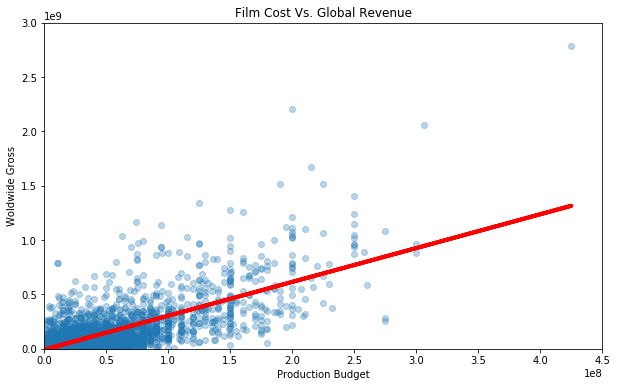

In [85]:
plt.figure(figsize=(10,6))

plt.scatter(x, y, alpha=0.3)
plt.plot(x, regression.predict(x), c='red', lw=4)


plt.title('Film Cost Vs. Global Revenue')
plt.xlabel('Production Budget')
plt.ylabel('Woldwide Gross')
plt.ylim(0, 3000000000)
plt.xlim(0, 450000000)


In [86]:
regression.score(x,y)

0.5496485356985729